# Hierarchical Clustering

### Agglometrative HC
> Build from bottom up

1. Make each data point a single-point cluster => forms N clusters
2. Take the two closest data points and make them one cluster => forms N-1
3. Take the the two closest clusters and make them one cluster => forms N-2
4. repeat step 3 until there is only one cluster
FIN

#### Distance between Clusters
Option 1. Closest Points  
Option 2. Furthest Points  
Option 3. Average Distance of all points  
Option 4. Distance Between Centroids  


### Dendograms Works
- Dendorams stores dissimilarity (distance) between 2
clusters in every step  
- Add a threshold on distance (represent dissimilarity) 
to separate cluster  
- the horizontal threadhold line can tell how many
cluster we will have by find all cross with vertical line (represent dissimilarity)
- **Recommend approach to find threadhold**: 
find the longest vertical line doesn't cross any extended horizontal line

## Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:,[3,4]].values

In [4]:
print(dataset.head)

<bound method NDFrame.head of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>


## Using the dendrogram to find the optimal number of clusters

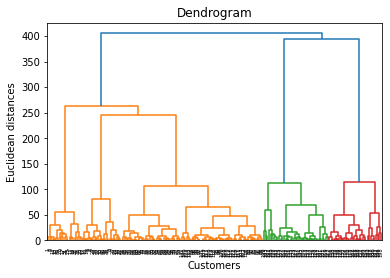

In [6]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram")
# In Dendrogram, X-axis is the observation points;
# In this case, it's customer
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

## Training the Hierarchical Clustering model on the dataset

In [10]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [11]:
print(y_hc)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


## Visualising the clusters

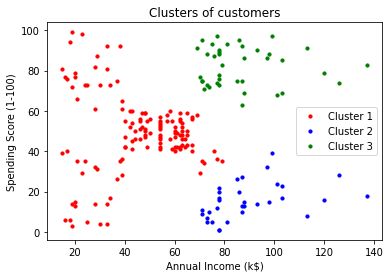

In [13]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()